<a href="https://colab.research.google.com/github/RoitRapha/FUEP21-22_XAI/blob/develop/XAI_Soundanalysis_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Install all needed Libaries**

In [ ]:
!pip install librosa
!pip install shap
!pip install xgboost

#**Import Libaries**

In [ ]:
import os
import pandas as pd
import shap
import xgboost
import numpy as np
import csv
shap.initjs()

#**Load the Dataframe**

In [ ]:
# Load the Dataframe
df = pd.read_csv("frequencyFeatures.csv")
# Drop the Classification off
df = df.iloc[250:df.shape[0], :]
# For further task we need to extract the ID as an own Dataframe
id = df['ID']
df.head()

,ID,Label,Timestamp,xAcc010Hz,xAcc015Hz,xAcc020Hz,xAcc025Hz,xAcc030Hz,xAcc035Hz,xAcc040Hz,...,snd2275Hz,snd2300Hz,snd2325Hz,snd2350Hz,snd2375Hz,snd2400Hz,snd2425Hz,snd2450Hz,snd2475Hz,snd2500Hz
250,2,on,0.00,454.729201,373.662293,841.151061,740.903054,335.169305,1277.359858,2338.590535,...,2.081464,2.573535,2.920927,4.982745,3.420132,0.867515,4.606851,2.301164,3.850050,2.092610
251,2,on,0.04,183.645769,320.688104,604.463776,746.636921,417.433785,1024.675231,2260.370181,...,1.899494,4.541002,5.725692,3.447297,2.802118,1.385863,2.985951,3.087122,5.687176,1.633761
252,2,on,0.08,192.824680,197.466285,237.154490,545.014362,524.603158,858.507832,356.197129,...,3.947479,4.772883,9.668906,3.489168,2.272290,2.577190,2.675607,5.028594,5.148495,2.285906
253,2,on,0.12,444.692309,607.832208,311.244219,598.615257,557.446143,644.497740,1136.291001,...,3.838190,3.088682,11.496789,2.656639,2.551696,2.951968,3.115344,3.571959,2.862464,4.497884
254,2,on,0.16,806.189855,213.300371,719.645236,379.386502,261.768009,13.231422,569.551468,...,2.575419,2.697834,7.483828,1.691467,2.032943,1.919057,1.855661,0.584894,0.871019,4.263095


#**For the Soundanalysis, only the Soundborn properties are considered**

In [ ]:
dfsnd = df.iloc[:, 70:170]
dfsnd = pd.concat([id, dfsnd], axis = 1)
dfsnd

,ID,zAcc115Hz,zAcc120Hz,snd0025Hz,snd0050Hz,snd0075Hz,snd0100Hz,snd0125Hz,snd0150Hz,snd0175Hz,...,snd2225Hz,snd2250Hz,snd2275Hz,snd2300Hz,snd2325Hz,snd2350Hz,snd2375Hz,snd2400Hz,snd2425Hz,snd2450Hz
250,2,1607.959557,1120.177544,0.162300,0.458318,0.408691,3.311513,0.124103,12.469847,0.986821,...,0.403224,3.129288,2.081464,2.573535,2.920927,4.982745,3.420132,0.867515,4.606851,2.301164
251,2,1357.950746,654.246108,0.402542,0.603234,0.609062,2.698957,0.814928,12.288622,0.734644,...,0.555723,1.443174,1.899494,4.541002,5.725692,3.447297,2.802118,1.385863,2.985951,3.087122
252,2,1414.726699,1083.543060,0.266010,0.680783,0.622318,1.558192,0.596363,12.608210,0.209707,...,2.464777,2.066302,3.947479,4.772883,9.668906,3.489168,2.272290,2.577190,2.675607,5.028594
253,2,660.088518,1089.808060,0.090904,0.569354,0.384968,1.889809,0.165778,12.732484,1.324396,...,4.778295,2.001557,3.838190,3.088682,11.496789,2.656639,2.551696,2.951968,3.115344,3.571959
254,2,480.118077,1032.193007,0.221308,0.327530,0.330362,1.954752,0.413268,9.673332,0.976533,...,4.961495,1.156322,2.575419,2.697834,7.483828,1.691467,2.032943,1.919057,1.855661,0.584894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,8,1182.081105,2014.673713,0.181274,0.439432,0.467662,3.949258,0.848503,8.827715,2.513653,...,4.213474,0.784681,1.810877,4.199799,3.196192,4.824971,5.501506,2.569931,2.769503,2.864246
1996,8,1231.462708,1414.986878,0.274382,0.626519,0.553968,3.646367,0.148372,10.793557,0.125817,...,4.698605,3.668648,5.296502,1.327645,2.921181,4.135513,7.574796,4.394050,1.986867,3.715002
1997,8,822.138310,1020.216554,0.259275,0.525672,0.552540,3.451722,1.138216,9.906488,1.763218,...,4.116190,5.047855,8.563501,3.625357,9.565385,2.401314,8.655602,3.706591,4.951512,3.277185
1998,8,423.993929,1114.531269,0.217249,0.191114,0.463569,3.125692,1.649416,7.604303,1.657646,...,2.261176,4.920980,8.862310,4.188897,13.152540,1.534665,6.803201,1.311985,3.673036,2.172725


#**Prepare for Training the Model**

In [ ]:
X = dfsnd.drop('ID', axis = 1)
y = dfsnd['ID']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

#**Train the Model**

In [ ]:
# The Hyperparameter of the Model is from the other Colab-Notebook
model_xgb = xgboost.XGBClassifier(silent = 0,
                                   max_depth = 6)

model_xgb.fit(X_train, y_train)

XGBClassifier(max_depth=6, objective='multi:softprob', silent=0)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


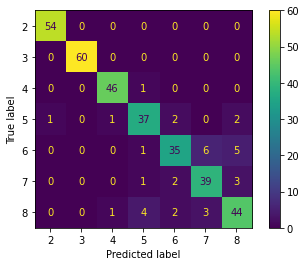

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
plot_confusion_matrix(model_xgb, X_test, y_test)

In [ ]:
model_xgb_predict = model_xgb.predict(X_test)
print(classification_report(y_test,model_xgb_predict))

              precision    recall  f1-score   support

           2       0.98      1.00      0.99        54
           3       1.00      1.00      1.00        60
           4       0.96      0.98      0.97        47
           5       0.84      0.86      0.85        43
           6       0.85      0.74      0.80        47
           7       0.81      0.87      0.84        45
           8       0.81      0.81      0.81        54

    accuracy                           0.90       350
   macro avg       0.89      0.90      0.89       350
weighted avg       0.90      0.90      0.90       350



#**SHAP-Values for all Classification**

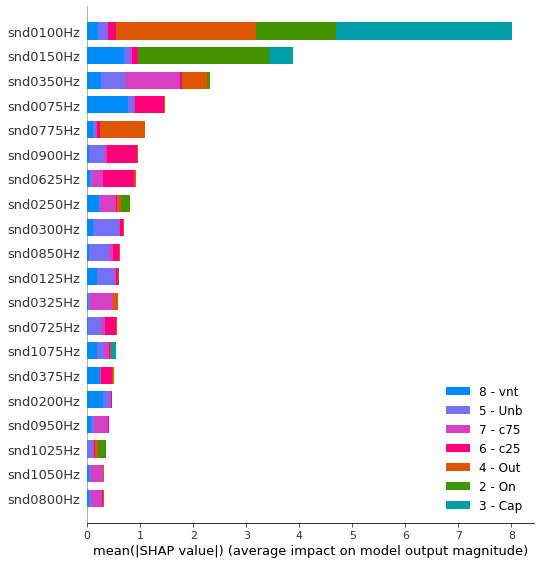

In [ ]:
shap_values = shap.TreeExplainer(model_xgb).shap_values(X)
class_names = ['2 - On', '3 - Cap', '4 - Out', '5 - Unb', '6 - c25', '7 - c75', '8 - vnt']
shap.summary_plot(shap_values, X, plot_type = "bar", class_names = class_names, feature_names = X.columns)

#**SHAP Summary Plot of the Classification to check the Method below**

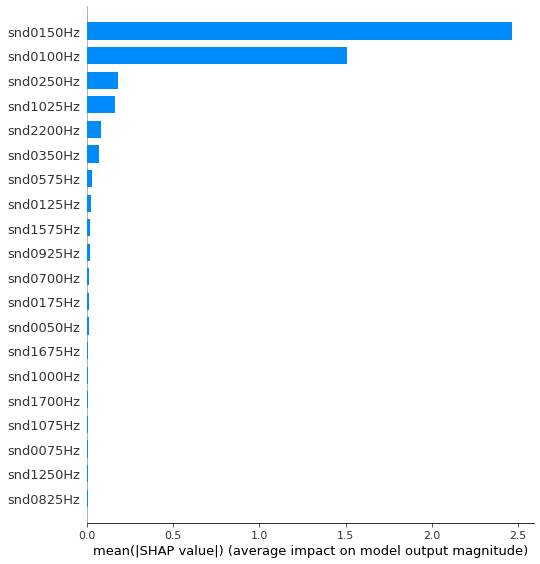

In [ ]:
shap.summary_plot(shap_values[0], X, class_names = class_names, plot_type="bar")

#**Get the SHAP-Values of all Classification**

In [ ]:
shap_values_on = shap_values[0] # Classification on
shap_values_cap = shap_values[1] # Classification cap
shap_values_out = shap_values[2] # Classification out
shap_values_unb = shap_values[3] # Classification unb
shap_values_c25 = shap_values[4] # Classification c25
shap_values_c75 = shap_values[5] # Classification c75
shap_values_vnt = shap_values[6] # Classification vnt

#**Get Lists of the 10 Importance Features of the Classifications**

In [ ]:
# Create a DataFrame where we save the Important Features of the Classifications
classes = ["on", "cap", "out", "unb", "c25", "c75", "vnt"]
ImpFea_of_all_classes = pd.DataFrame([])
feature_names = X.columns

# Set how many Features we extract from the SHAP-Values
k = 10
# For Loop through the SHAP-Values to extract and sort the Important Features
i = 0
for i in range(len(classes)):
  df_shap_values = pd.DataFrame(shap_values[i], columns = feature_names)
  values = np.abs(df_shap_values.values).mean(0)
  shap_importance = pd.DataFrame(list(zip(feature_names, values)),
                               columns = ['Feature', 'Feature Importance Values'])
  shap_importance.sort_values(by=['Feature Importance Values'],
                              ascending = False, inplace = True)
  ImpFea = list(shap_importance.iloc[0:k,0])

  ImpFea_of_all_classes[i] = ImpFea

ImpFea_of_all_classes.columns = [classes]
print(ImpFea_of_all_classes)

          on        cap        out        unb        c25        c75        vnt
0  snd0150Hz  snd0100Hz  snd0100Hz  snd0300Hz  snd0625Hz  snd0350Hz  snd0075Hz
1  snd0100Hz  snd0150Hz  snd0775Hz  snd0350Hz  snd0900Hz  snd0325Hz  snd0150Hz
2  snd0250Hz  snd0425Hz  snd0350Hz  snd0850Hz  snd0075Hz  snd0250Hz  snd0200Hz
3  snd1025Hz  snd0525Hz  snd0325Hz  snd0125Hz  snd0725Hz  snd0950Hz  snd0350Hz
4  snd2200Hz  snd1075Hz  snd0250Hz  snd0900Hz  snd0375Hz  snd1050Hz  snd0375Hz
5  snd0350Hz  snd0475Hz  snd1025Hz  snd0725Hz  snd0100Hz  snd0625Hz  snd0250Hz
6  snd0575Hz  snd1100Hz  snd0175Hz  snd0100Hz  snd0850Hz  snd0800Hz  snd0100Hz
7  snd0125Hz  snd0675Hz  snd0625Hz  snd2300Hz  snd0550Hz  snd0875Hz  snd0125Hz
8  snd1575Hz  snd2300Hz  snd0375Hz  snd0200Hz  snd0150Hz  snd1075Hz  snd1075Hz
9  snd0925Hz  snd0025Hz  snd0450Hz  snd1075Hz  snd0225Hz  snd0475Hz  snd0225Hz


In [ ]:
# Solo Lists with the Important Features of the Classifications
ImpFea_on = list(ImpFea_of_all_classes.iloc[:,0])
ImpFea_cap = list(ImpFea_of_all_classes.iloc[:,1])
ImpFea_out = list(ImpFea_of_all_classes.iloc[:,2])
ImpFea_unb = list(ImpFea_of_all_classes.iloc[:,3])
ImpFea_c25 = list(ImpFea_of_all_classes.iloc[:,4])
ImpFea_c75 = list(ImpFea_of_all_classes.iloc[:,5])
ImpFea_vnt = list(ImpFea_of_all_classes.iloc[:,6])

#**Concatenatet Features of all 7 Classifications**

In [ ]:
# "Concatenated" List of all Important Features of each Classifications with set we don´t add double Features
ImpFea_all = list(set(ImpFea_on + ImpFea_cap + ImpFea_out + ImpFea_unb + ImpFea_c25 + ImpFea_c75 + ImpFea_vnt))
# Check the Important Features
print(ImpFea_all)
print(len(ImpFea_all))

['snd0150Hz', 'snd1025Hz', 'snd0800Hz', 'snd0525Hz', 'snd0250Hz', 'snd0775Hz', 'snd0175Hz', 'snd1100Hz', 'snd0325Hz', 'snd0550Hz', 'snd0875Hz', 'snd0625Hz', 'snd0300Hz', 'snd0950Hz', 'snd1075Hz', 'snd0125Hz', 'snd0450Hz', 'snd0075Hz', 'snd0575Hz', 'snd0200Hz', 'snd0025Hz', 'snd0225Hz', 'snd0375Hz', 'snd2200Hz', 'snd0900Hz', 'snd0425Hz', 'snd0850Hz', 'snd2300Hz', 'snd1575Hz', 'snd1050Hz', 'snd0725Hz', 'snd0350Hz', 'snd0925Hz', 'snd0475Hz', 'snd0100Hz', 'snd0675Hz']
36


#**Train a new XGBoost with the Important Features of all Classifications**

In [ ]:
dfsnd_ImpFea = dfsnd.loc[:, ImpFea_all]
dfsnd_ImpFea = pd.concat([id, dfsnd_ImpFea], axis = 1)

X_ImpFea = dfsnd_ImpFea.drop('ID', axis = 1)
y_ImpFea = dfsnd['ID']

from sklearn.model_selection import train_test_split

X_ImpFea_train, X_ImpFea_test, y_ImpFea_train, y_ImpFea_test = train_test_split(X_ImpFea, y_ImpFea, test_size = 0.2, random_state = 7)

In [ ]:
# The Hyperparameter of the Model is from the other Colab-Notebook
model_xgb_ImpFea = xgboost.XGBClassifier(silent = 0,
                                   max_depth = 6)

model_xgb_ImpFea.fit(X_ImpFea_train, y_ImpFea_train)

XGBClassifier(max_depth=6, objective='multi:softprob', silent=0)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


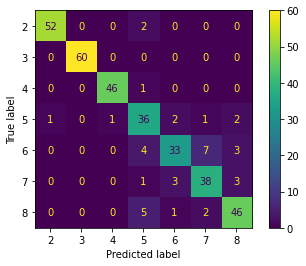

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
plot_confusion_matrix(model_xgb_ImpFea, X_ImpFea_test, y_ImpFea_test)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


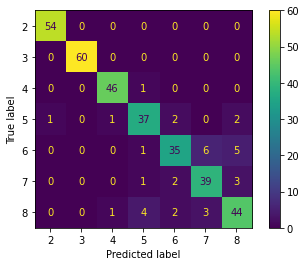

In [ ]:
# Again the Confusion Matrix of the XGBoost with all snd´s for comparison
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
plot_confusion_matrix(model_xgb, X_test, y_test)

In [ ]:
model_xgb_ImpFea_predict = model_xgb_ImpFea.predict(X_ImpFea_test)
print(classification_report(y_ImpFea_test,model_xgb_ImpFea_predict))

              precision    recall  f1-score   support

           2       0.98      0.96      0.97        54
           3       1.00      1.00      1.00        60
           4       0.98      0.98      0.98        47
           5       0.73      0.84      0.78        43
           6       0.85      0.70      0.77        47
           7       0.79      0.84      0.82        45
           8       0.85      0.85      0.85        54

    accuracy                           0.89       350
   macro avg       0.88      0.88      0.88       350
weighted avg       0.89      0.89      0.89       350



#**Load Librosa and other Libaries**

In [ ]:
import os
import librosa 
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 

#**Load the Audiofiles**

In [ ]:
on_02 = "02_on_audio.wav"
cap_03 = "03_cap_audio.wav"
out_04 = "04_out_audio.wav"
unb_05 = "05_unb_audio.wav"
c25_06 = "06_c25_audio.wav"
c75_07 = "07_c75_audio.wav"
vnt_08 = "08_vnt_audio.wav"

In [ ]:
on, sr   = librosa.load(on_02,  sr = None, mono = True, offset = 0.0, duration = None)
cap, _ = librosa.load(cap_03, sr = None, mono = True, offset = 0.0, duration = None)
out, _ = librosa.load(out_04, sr = None, mono = True, offset = 0.0, duration = None)
unb, _ = librosa.load(unb_05, sr = None, mono = True, offset = 0.0, duration = None)
c25, _ = librosa.load(c25_06, sr = None, mono = True, offset = 0.0, duration = None)
c75, _ = librosa.load(c75_07, sr = None, mono = True, offset = 0.0, duration = None)
vnt, _ = librosa.load(vnt_08, sr = None, mono = True, offset = 0.0, duration = None)

#**Short-Fourier-Transformation**

In [ ]:
Frame_Size = 9600
Hop_Size = 1920

In [ ]:
S_on = librosa.stft(on, n_fft = Frame_Size, hop_length = Hop_Size)
S_cap = librosa.stft(cap, n_fft = Frame_Size, hop_length = Hop_Size)
S_out = librosa.stft(out, n_fft = Frame_Size, hop_length = Hop_Size)
S_unb = librosa.stft(unb, n_fft = Frame_Size, hop_length = Hop_Size)
S_c25 = librosa.stft(c25, n_fft = Frame_Size, hop_length = Hop_Size)
S_c75 = librosa.stft(c75, n_fft = Frame_Size, hop_length = Hop_Size)
S_vnt = librosa.stft(vnt, n_fft = Frame_Size, hop_length = Hop_Size)

#**Mel-Spectogram for all Classifications**


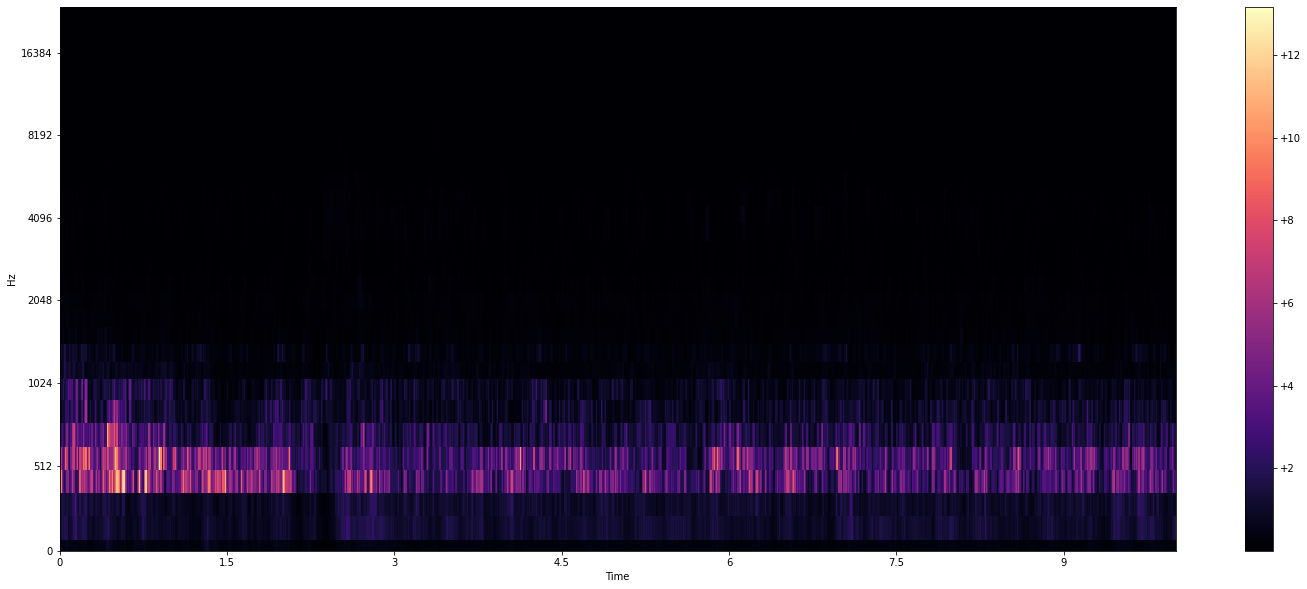

In [ ]:
# Data Analysis with an Mel-Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(on, sr=sr, n_fft=2048, hop_length=512, n_mels=30)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mel_spectrogram,
                         x_axis = "time",
                         y_axis = "mel",
                         sr = sr)
plt.colorbar(format="%+2.f")
plt.show()

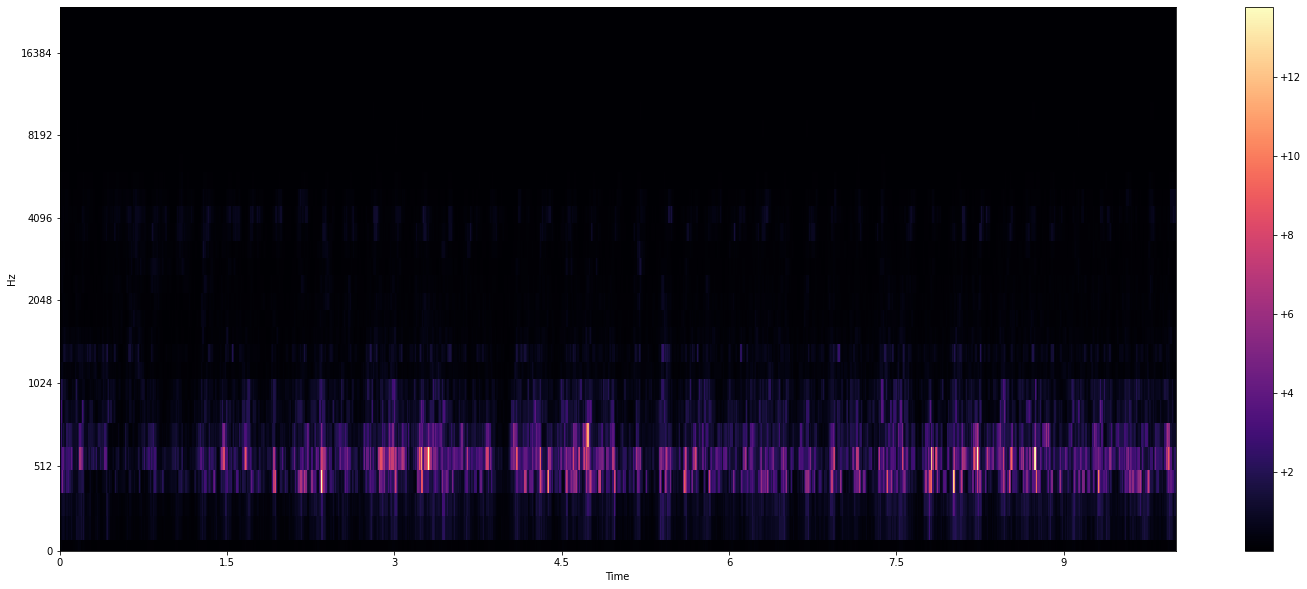

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(cap, sr=sr, n_fft=2048, hop_length=512, n_mels=30)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mel_spectrogram,
                         x_axis = "time",
                         y_axis = "mel",
                         sr = sr)
plt.colorbar(format="%+2.f")
plt.show()

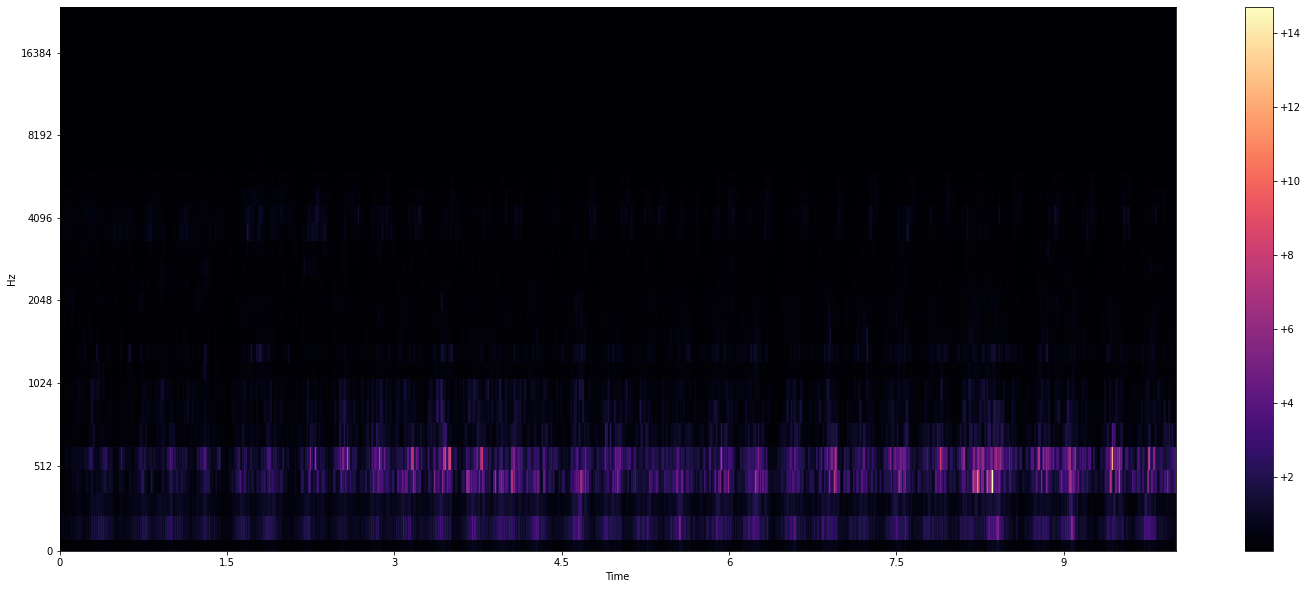

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(out, sr=sr, n_fft=2048, hop_length=512, n_mels=30)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mel_spectrogram,
                         x_axis = "time",
                         y_axis = "mel",
                         sr = sr)
plt.colorbar(format="%+2.f")
plt.show()

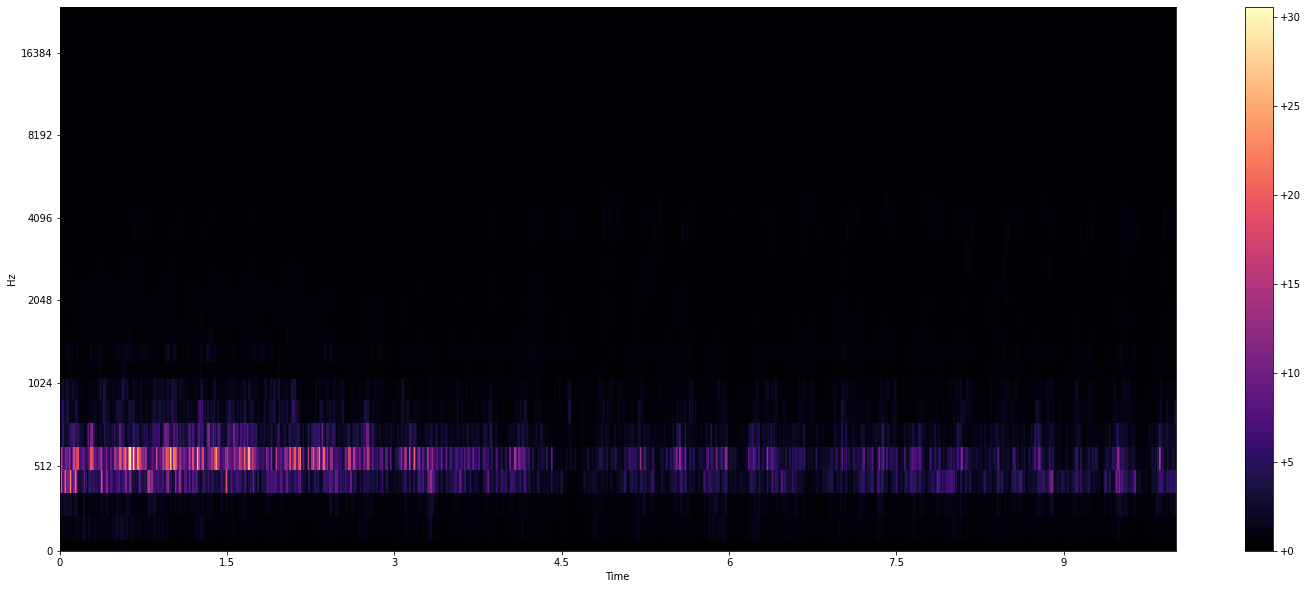

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(unb, sr=sr, n_fft=2048, hop_length=512, n_mels=30)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mel_spectrogram,
                         x_axis = "time",
                         y_axis = "mel",
                         sr = sr)
plt.colorbar(format="%+2.f")
plt.show()

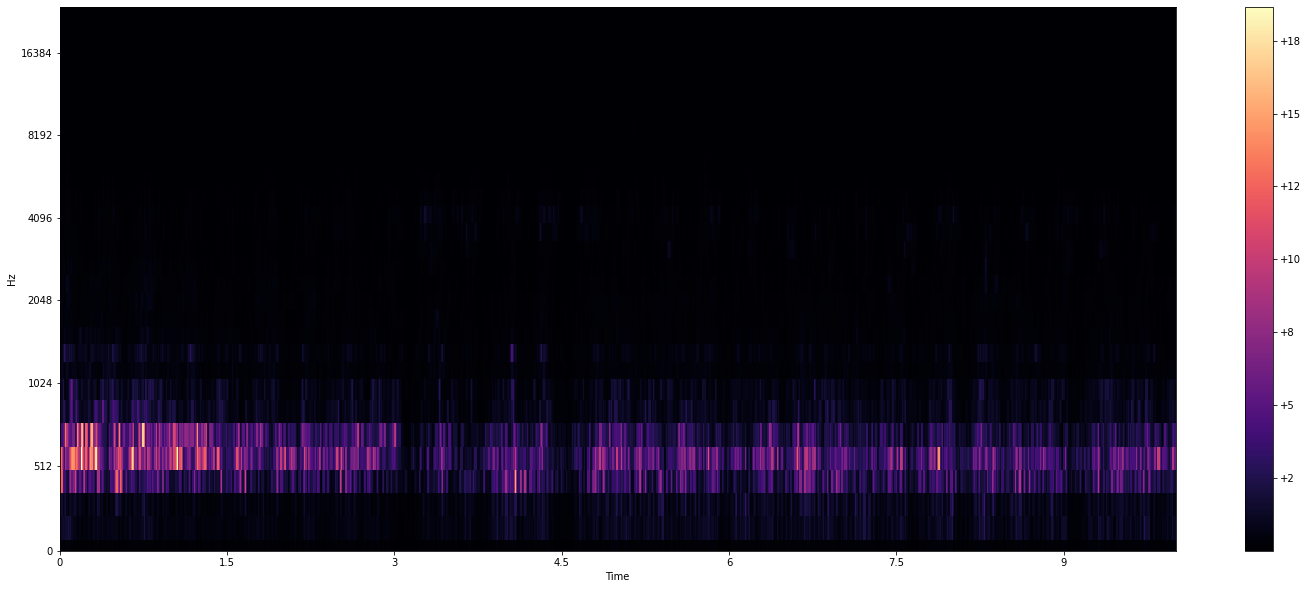

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(c25, sr=sr, n_fft=2048, hop_length=512, n_mels=30)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mel_spectrogram,
                         x_axis = "time",
                         y_axis = "mel",
                         sr = sr)
plt.colorbar(format="%+2.f")
plt.show()

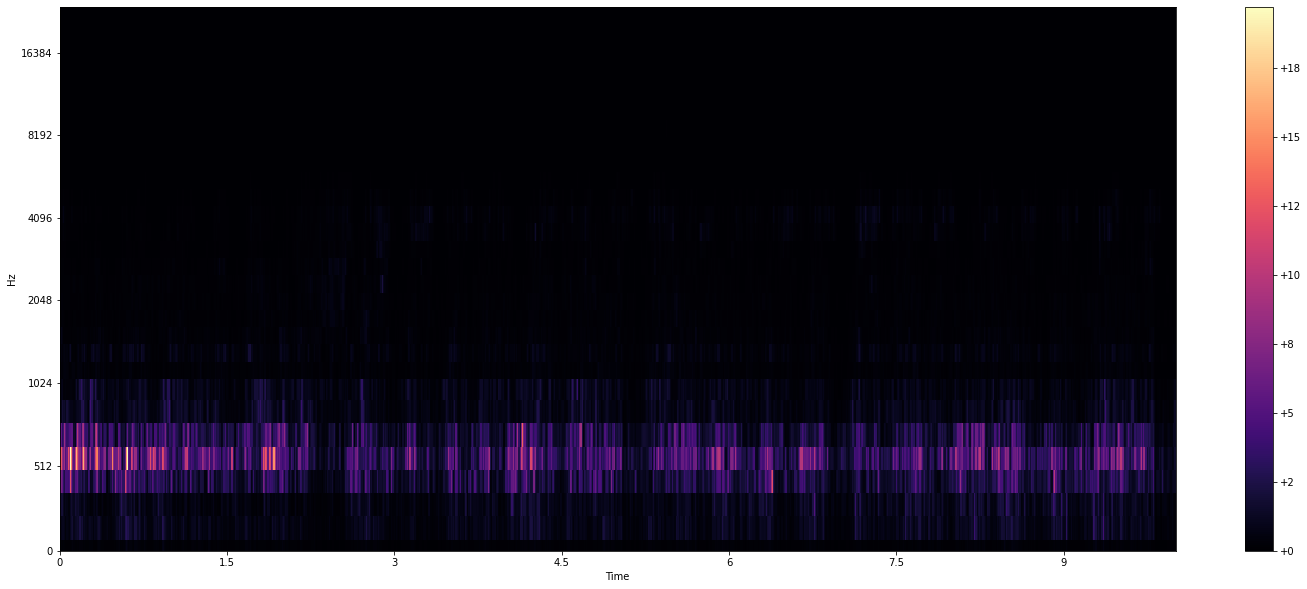

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(c75, sr=sr, n_fft=2048, hop_length=512, n_mels=30)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mel_spectrogram,
                         x_axis = "time",
                         y_axis = "mel",
                         sr = sr)
plt.colorbar(format="%+2.f")
plt.show()

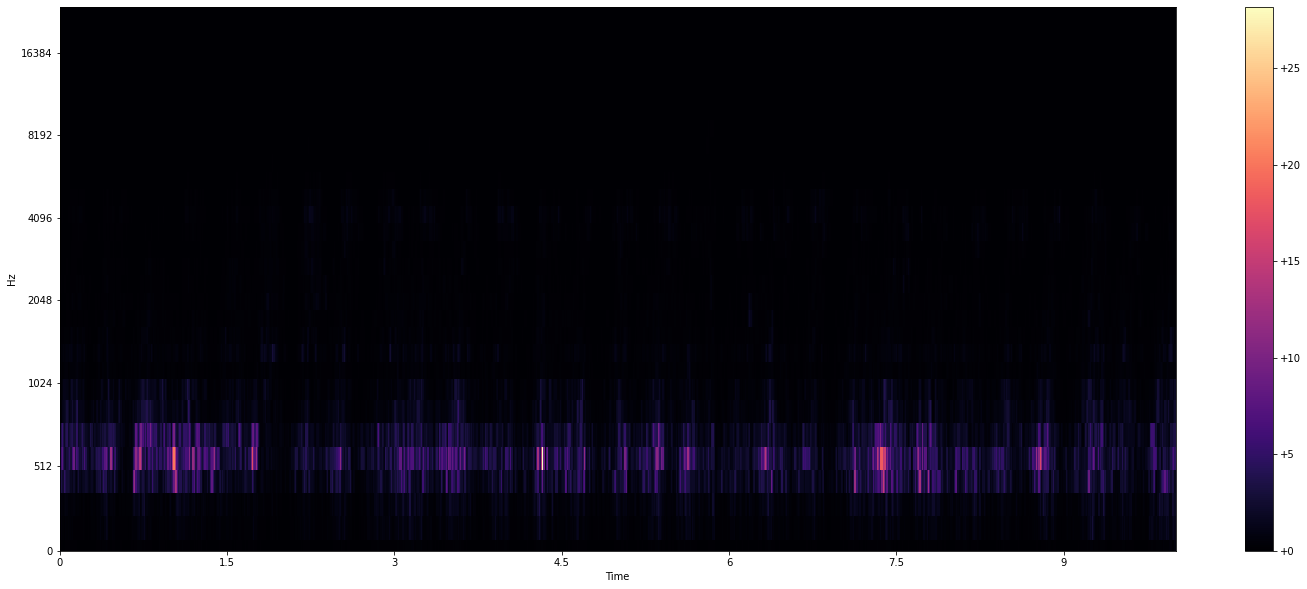

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(vnt, sr=sr, n_fft=2048, hop_length=512, n_mels=30)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mel_spectrogram,
                         x_axis = "time",
                         y_axis = "mel",
                         sr = sr)
plt.colorbar(format="%+2.f")
plt.show()

#**Function for the Data Preparation of the Fourier-Transformed Array´s**

In [ ]:
# For the data preparation, Fourier transformed arrays created with Librosa are converted into a data frame. 
# The lines are named according to the properties of the original data set (Example: 'snd0100Hz') in order to call these lines afterwards via the created list ImpFea_all.
# In addition, another column with ascending numbers is added to get the original form back in the postprocessing.
def DataPrep(S_input):
  S_output = pd.DataFrame(S_input)
  index_name = list(range(5, S_output.shape[0]*5+5, 5))
  number = np.arange(0,S_output.shape[0],1)
  S_output['Frequencies'] = index_name
  S_output = S_output.set_index('Frequencies')
  a = S_output.iloc[0:19,:]
  a = pd.DataFrame(a)
  a = a.set_index('snd00' + a.index.astype(str) + 'Hz')
  b = S_output.iloc[19:199,:]
  b = pd.DataFrame(b)
  b = b.set_index('snd0' + b.index.astype(str) + 'Hz')
  c = S_output.iloc[199:S_output.shape[0],:]
  c = c.set_index('snd' + c.index.astype(str) + 'Hz')

  S_output = pd.concat([a,b,c], axis = 0)
  S_output['Numbers'] = number

  return S_output

In [ ]:
# Call the Function and create the STFT-Array´s to an Dataframe with column names
S_on = DataPrep(S_input = S_on)
S_cap = DataPrep(S_input = S_cap)
S_out = DataPrep(S_input = S_out)
S_unb = DataPrep(S_input = S_unb)
S_c25 = DataPrep(S_input = S_c25)
S_c75 = DataPrep(S_input = S_c75)
S_vnt = DataPrep(S_input = S_vnt)

In [ ]:
# Get the Values from the STFT Array´s but only the Important Features from SHAP
def extract_ImpFea(S_input):
  Important_Values_output = S_input.loc[ImpFea_all,:]
  Important_Values_output = pd.DataFrame(Important_Values_output)
  # In addition, we set other values of important properties to 0. The reason for this is that these frequencies have a high amplitude and may be due to the engine rotation sound and its multiples.
  Important_Values_output.loc[['snd0100Hz', 'snd0150Hz', 'snd0200Hz', 'snd0250Hz', 'snd0300Hz',
                               'snd0350Hz'], :] = 0
  return Important_Values_output

In [ ]:
Important_Values_on = extract_ImpFea(S_input = S_on)
Important_Values_cap = extract_ImpFea(S_input = S_cap)
Important_Values_out = extract_ImpFea(S_input = S_out)
Important_Values_unb = extract_ImpFea(S_input = S_unb)
Important_Values_c25 = extract_ImpFea(S_input = S_c25)
Important_Values_c75 = extract_ImpFea(S_input = S_c75)
Important_Values_vnt = extract_ImpFea(S_input = S_vnt)

In [ ]:
# The next Function is to concat the Values that we set 0 and the Values of the Important Features this is important for the backtransformation (inverse STFT) with Librosa (they must have the same size like the input)
def manipulation(S_input, Important_Values_input):
  S_output = S_input.drop(ImpFea_all, axis = 0)
  S_output.iloc[:, 0:S_output.shape[1]-1] = 0
  S_output = pd.concat([S_output, Important_Values_input], axis = 0)
  S_output = S_output.sort_values(by = 'Numbers')
  S_output = S_output.drop('Numbers', axis = 1)
  S_output = S_output.to_numpy()
  return S_output

In [ ]:
S_on_np = manipulation(S_input = S_on, Important_Values_input = Important_Values_on)
S_cap_np = manipulation(S_input = S_cap, Important_Values_input = Important_Values_cap)
S_out_np = manipulation(S_input = S_out, Important_Values_input = Important_Values_out)
S_unb_np = manipulation(S_input = S_unb, Important_Values_input = Important_Values_unb)
S_c25_np = manipulation(S_input = S_c25, Important_Values_input = Important_Values_c25)
S_c75_np = manipulation(S_input = S_c75, Important_Values_input = Important_Values_c75)
S_vnt_np = manipulation(S_input = S_vnt, Important_Values_input = Important_Values_vnt)

In [ ]:
audio_on = librosa.istft(S_on_np, hop_length = Hop_Size)
audio_cap = librosa.istft(S_cap_np, hop_length = Hop_Size)
audio_out = librosa.istft(S_out_np, hop_length = Hop_Size)
audio_unb = librosa.istft(S_unb_np, hop_length = Hop_Size)
audio_c25 = librosa.istft(S_c25_np, hop_length = Hop_Size)
audio_c75 = librosa.istft(S_c75_np, hop_length = Hop_Size)
audio_vnt = librosa.istft(S_vnt_np, hop_length = Hop_Size)

In [ ]:
import soundfile as sf
sf.write('Important_Features_on.wav', audio_on, 44100)
sf.write('Important_Features_cap.wav', audio_cap, 44100)
sf.write('Important_Features_out.wav', audio_out, 44100)
sf.write('Important_Features_unb.wav', audio_unb, 44100)
sf.write('Important_Features_c25.wav', audio_c25, 44100)
sf.write('Important_Features_c75.wav', audio_c75, 44100)
sf.write('Important_Features_vnt.wav', audio_vnt, 44100)

#**Mel-Spectrogramme for the reduced Audios**

In [ ]:
on_ImpFea = "Important_Features_on.wav"
cap_ImpFea = "Important_Features_cap.wav"
out_ImpFea = "Important_Features_out.wav"
unb_ImpFea = "Important_Features_unb.wav"
c25_ImpFea = "Important_Features_c25.wav"
c75_ImpFea = "Important_Features_c75.wav"
vnt_ImpFea = "Important_Features_vnt.wav"

In [ ]:
on_ImpFea, sr   = librosa.load(on_ImpFea,  sr = None, mono = True, offset = 0.0, duration = None)
cap_ImpFea, _ = librosa.load(cap_ImpFea, sr = None, mono = True, offset = 0.0, duration = None)
out_ImpFea, _ = librosa.load(out_ImpFea, sr = None, mono = True, offset = 0.0, duration = None)
unb_ImpFea, _ = librosa.load(unb_ImpFea, sr = None, mono = True, offset = 0.0, duration = None)
c25_ImpFea, _ = librosa.load(c25_ImpFea, sr = None, mono = True, offset = 0.0, duration = None)
c75_ImpFea, _ = librosa.load(c75_ImpFea, sr = None, mono = True, offset = 0.0, duration = None)
vnt_ImpFea, _ = librosa.load(vnt_ImpFea, sr = None, mono = True, offset = 0.0, duration = None)

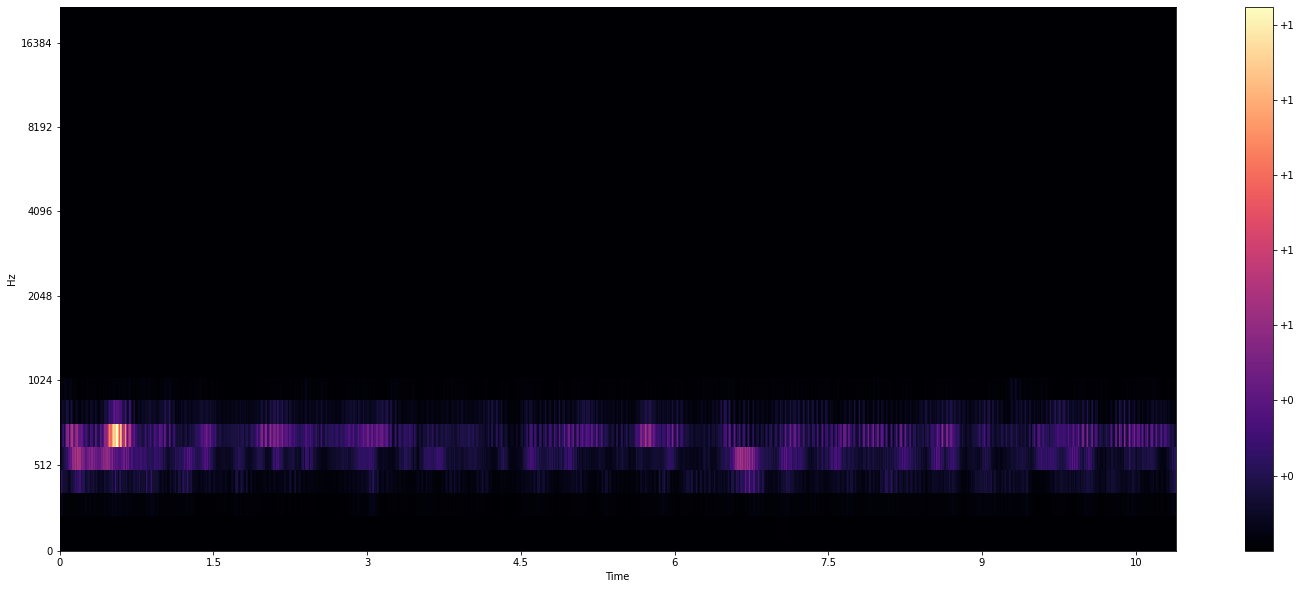

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(on_ImpFea, sr=sr, n_fft=2048, hop_length=512, n_mels=30)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mel_spectrogram,
                         x_axis = "time",
                         y_axis = "mel",
                         sr = sr)
plt.colorbar(format="%+2.f")
plt.show()

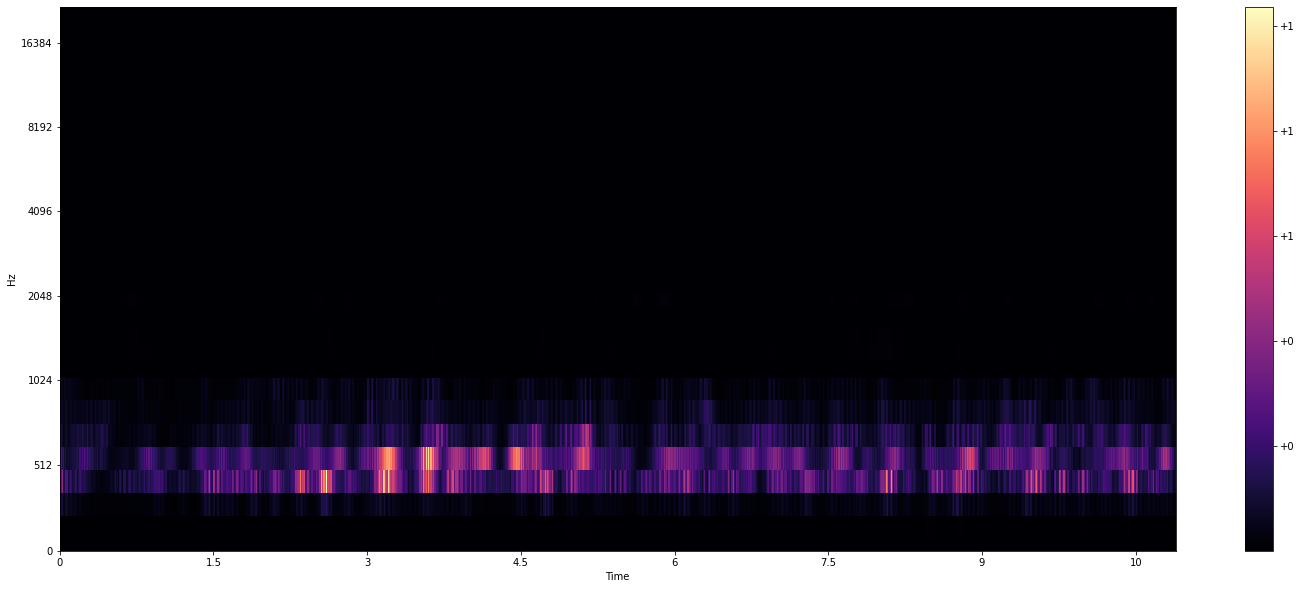

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(cap_ImpFea, sr=sr, n_fft=2048, hop_length=512, n_mels=30)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mel_spectrogram,
                         x_axis = "time",
                         y_axis = "mel",
                         sr = sr)
plt.colorbar(format="%+2.f")
plt.show()

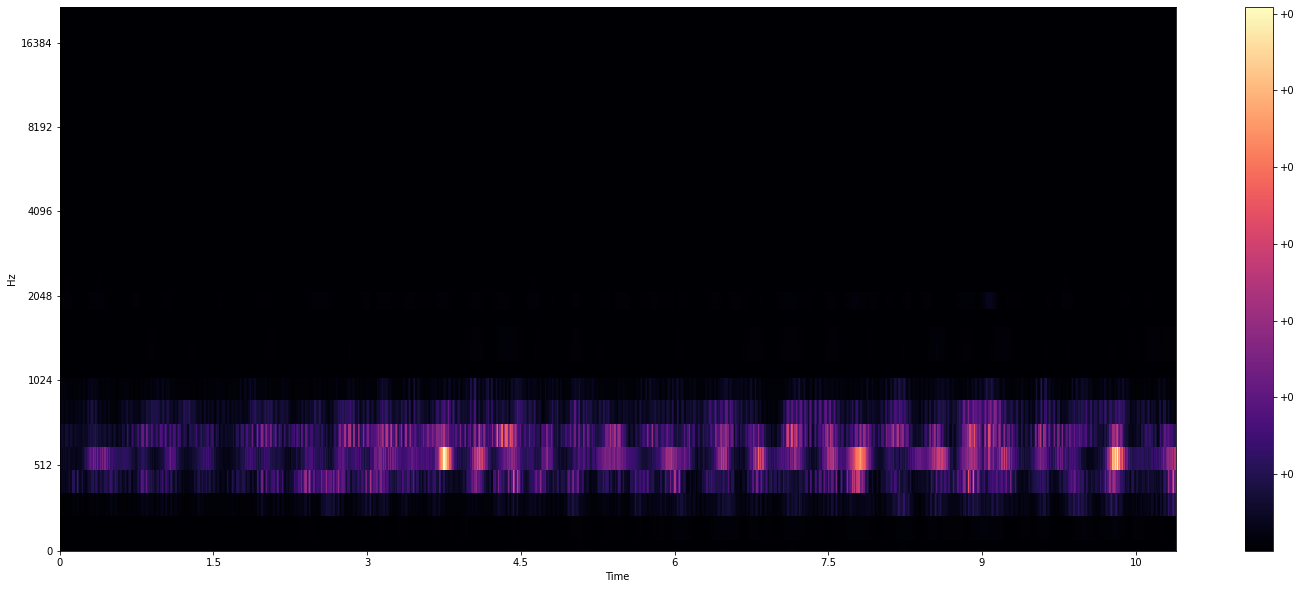

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(out_ImpFea, sr=sr, n_fft=2048, hop_length=512, n_mels=30)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mel_spectrogram,
                         x_axis = "time",
                         y_axis = "mel",
                         sr = sr)
plt.colorbar(format="%+2.f")
plt.show()

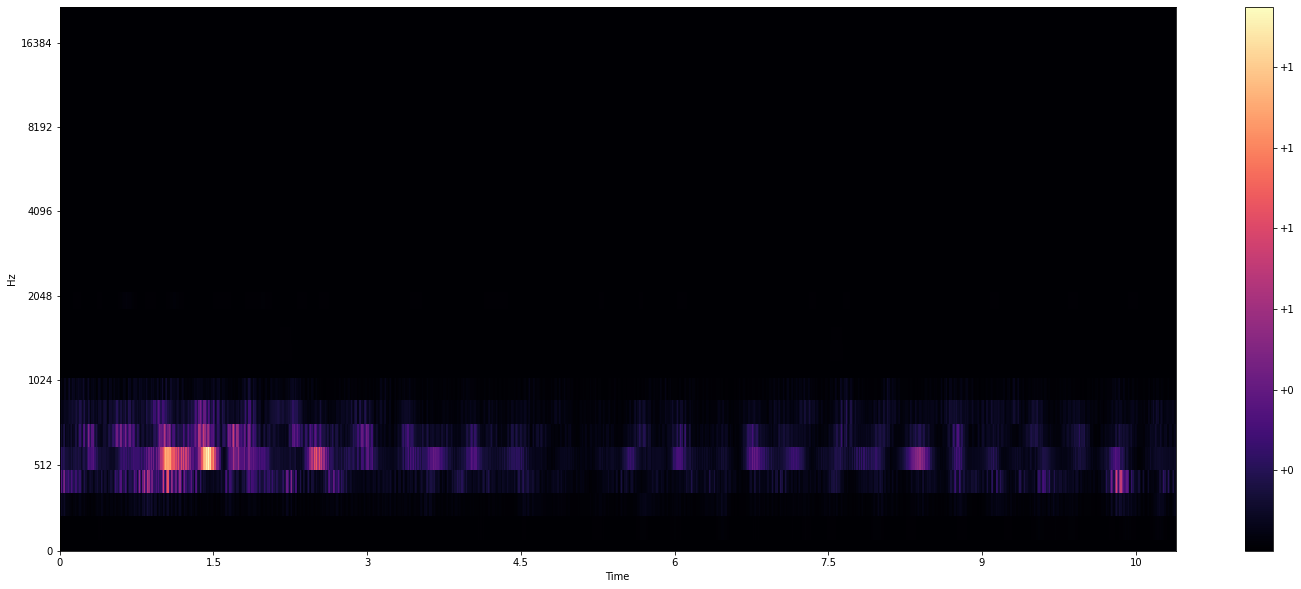

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(unb_ImpFea, sr=sr, n_fft=2048, hop_length=512, n_mels=30)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mel_spectrogram,
                         x_axis = "time",
                         y_axis = "mel",
                         sr = sr)
plt.colorbar(format="%+2.f")
plt.show()

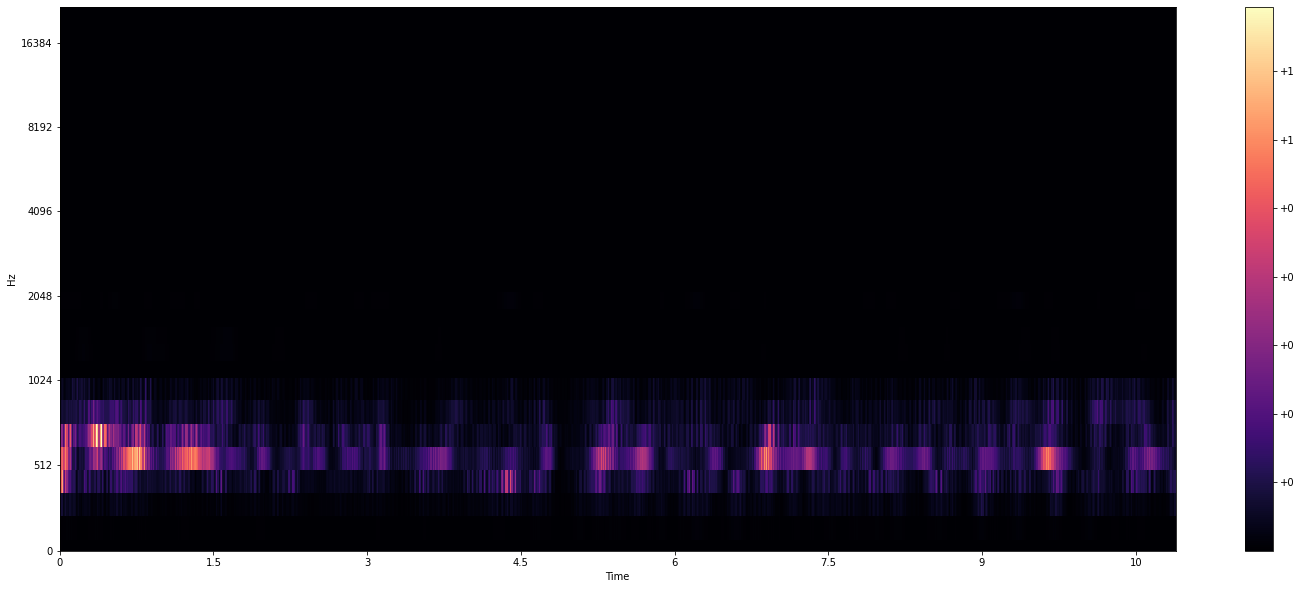

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(c25_ImpFea, sr=sr, n_fft=2048, hop_length=512, n_mels=30)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mel_spectrogram,
                         x_axis = "time",
                         y_axis = "mel",
                         sr = sr)
plt.colorbar(format="%+2.f")
plt.show()

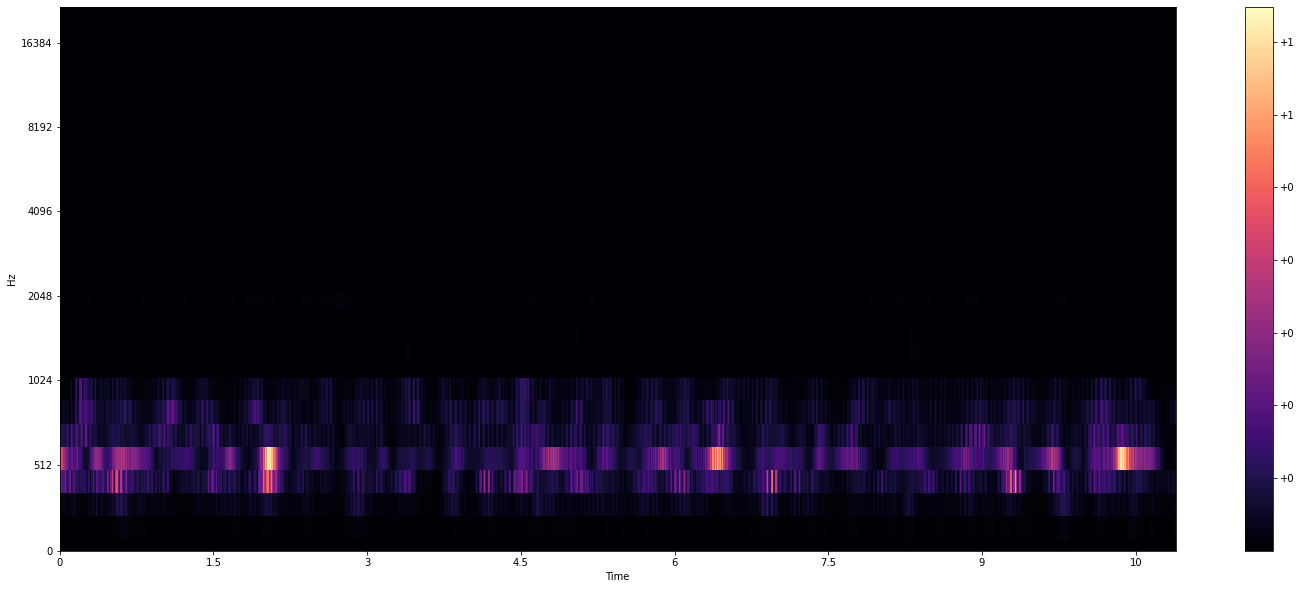

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(c75_ImpFea, sr=sr, n_fft=2048, hop_length=512, n_mels=30)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mel_spectrogram,
                         x_axis = "time",
                         y_axis = "mel",
                         sr = sr)
plt.colorbar(format="%+2.f")
plt.show()

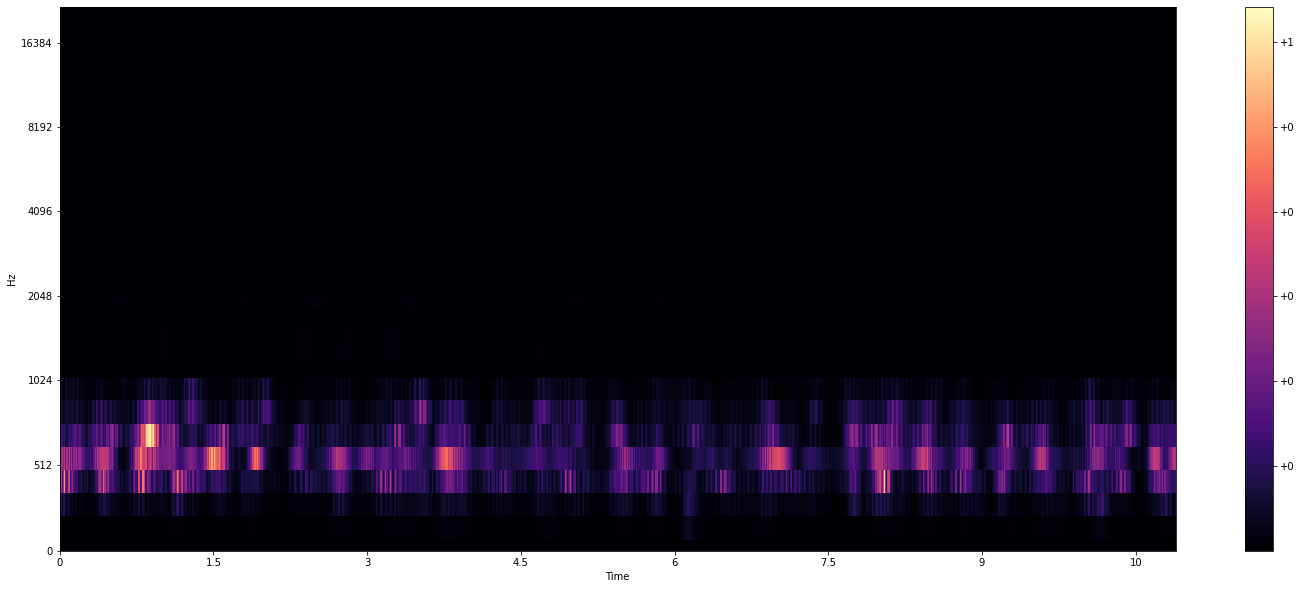

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(vnt_ImpFea, sr=sr, n_fft=2048, hop_length=512, n_mels=30)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mel_spectrogram,
                         x_axis = "time",
                         y_axis = "mel",
                         sr = sr)
plt.colorbar(format="%+2.f")
plt.show()